<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


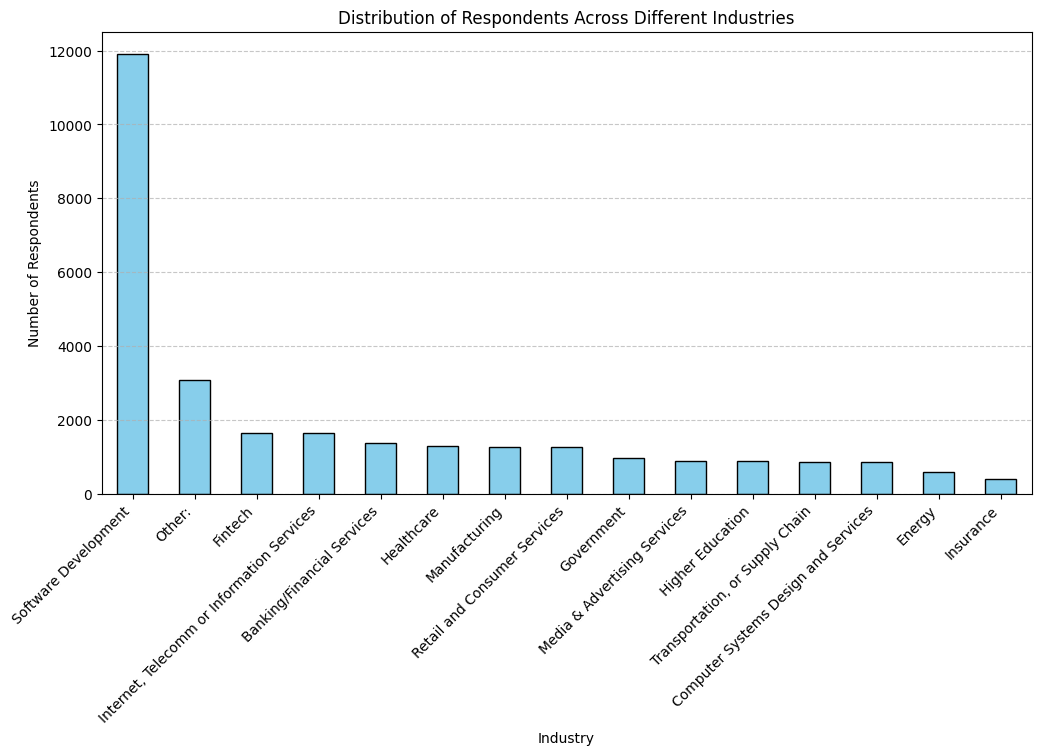

Top 5 industries with the highest number of respondents:
 Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Name: count, dtype: int64


In [3]:
##Write your code here

# Explore distribution across different industries
industry_counts = df["Industry"].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
industry_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Industry")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Respondents Across Different Industries")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

# Highlight notable trends
print("Top 5 industries with the highest number of respondents:\n", industry_counts.head())


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here


# Calculate basic statistics for ConvertedCompYearly
mean_comp = df["ConvertedCompYearly"].mean()
median_comp = df["ConvertedCompYearly"].median()
std_comp = df["ConvertedCompYearly"].std()

# Print the statistics
print(f"Mean Compensation: {mean_comp}")
print(f"Median Compensation: {median_comp}")
print(f"Standard Deviation of Compensation: {std_comp}")

# Define a threshold for extreme compensation (3 standard deviations above the mean)
threshold = mean_comp + (3 * std_comp)

# Identify respondents with extremely high yearly compensation
extreme_comp_respondents = df[df["ConvertedCompYearly"] > threshold]

# Print the number of respondents with extremely high compensation
print(f"Number of respondents with extremely high compensation: {len(extreme_comp_respondents)}")

# Optional: Display a few examples
print("\nExamples of respondents with extreme compensation:")
print(extreme_comp_respondents[["ConvertedCompYearly", "Country", "Employment"]].head())


Mean Compensation: 86155.28726264134
Median Compensation: 65000.0
Standard Deviation of Compensation: 186756.97308629757
Number of respondents with extremely high compensation: 89

Examples of respondents with extreme compensation:
      ConvertedCompYearly                   Country           Employment
529              650000.0  United States of America  Employed, full-time
828             1000000.0  United States of America  Employed, full-time
1932             945000.0  United States of America  Employed, full-time
2171             750000.0  United States of America  Employed, full-time
2187            2000000.0                     Gabon  Employed, full-time


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Number of outliers in ConvertedCompYearly: 978

Examples of outliers:
     ConvertedCompYearly                   Country           Employment
428             230000.0  United States of America  Employed, full-time
456             300000.0  United States of America  Employed, full-time
461             254425.0                    Canada  Employed, full-time
529             650000.0  United States of America  Employed, full-time
545             400000.0  United States of America  Employed, full-time


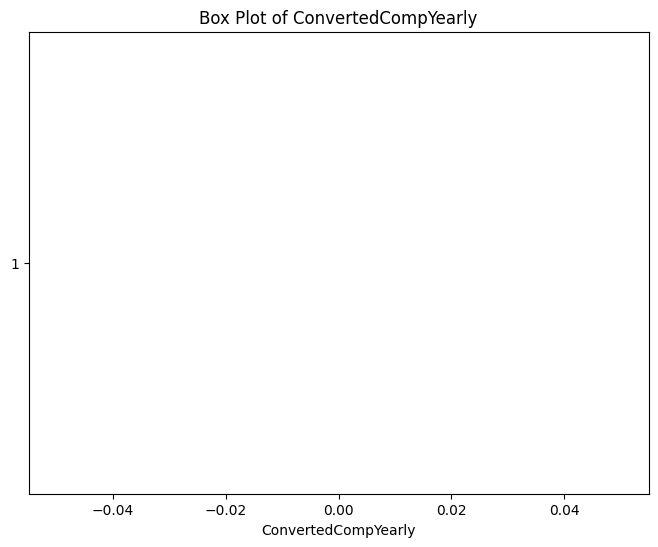

In [5]:
##Write your code here


# Calculate the Interquartile Range (IQR) for ConvertedCompYearly
Q1 = df["ConvertedCompYearly"].quantile(0.25)  # 25th percentile
Q3 = df["ConvertedCompYearly"].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df["ConvertedCompYearly"] < lower_bound) | (df["ConvertedCompYearly"] > upper_bound)]

# Count the number of outliers
print(f"Number of outliers in ConvertedCompYearly: {len(outliers)}")

# Optional: Display a few examples of outliers
print("\nExamples of outliers:")
print(outliers[["ConvertedCompYearly", "Country", "Employment"]].head())

# Visualize outliers using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df["ConvertedCompYearly"], vert=False, patch_artist=True)
plt.title("Box Plot of ConvertedCompYearly")
plt.xlabel("ConvertedCompYearly")
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
# Remove outliers from the dataset
df_no_outliers = df[(df["ConvertedCompYearly"] >= lower_bound) & (df["ConvertedCompYearly"] <= upper_bound)]

# Validate the size of the new DataFrame
print(f"Original DataFrame size: {df.shape}")
print(f"New DataFrame size after removing outliers: {df_no_outliers.shape}")


Original DataFrame size: (65437, 114)
New DataFrame size after removing outliers: (22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Correlation with Age (transformed):
ResponseId            NaN
MainBranch            NaN
Age                   NaN
Employment            NaN
RemoteWork            NaN
                       ..
SurveyLength          NaN
SurveyEase            NaN
ConvertedCompYearly   NaN
JobSat                NaN
Age_transformed       NaN
Name: Age_transformed, Length: 115, dtype: float64


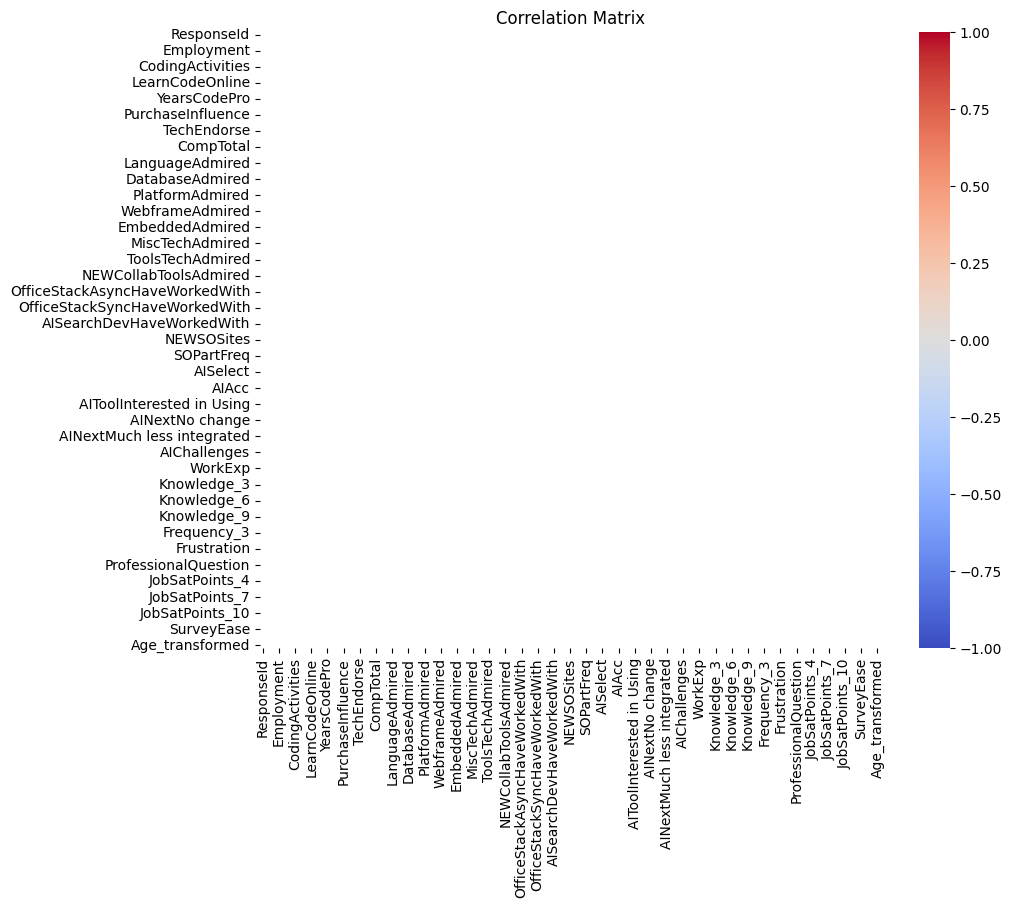

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame 'df'
# First, clean the Age column by mapping categorical values to numeric

# Mapping age categories to numeric values
age_mapping = {
    '18-24': 21,
    '25-34': 29,
    '35-44': 39,
    '45-54': 49,
    '55-64': 59,
    '65+': 65
}

# If 'Age' is a categorical column, we map it to numeric values
# If it's already numeric, you can skip the transformation step
df['Age_transformed'] = df['Age'].map(age_mapping)

# Handle non-numeric values in other columns by converting them to numeric or dropping rows
# For example, convert or remove non-numeric values in numeric columns like 'ConvertedCompYearly'

# For columns with numeric data but with non-numeric entries, you can try to coerce them to NaN, then fill or drop.
# Here we try to convert 'ConvertedCompYearly' to numeric, coercing errors to NaN (invalid parsing)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop rows with NaN values in numerical columns for correlation computation
df_cleaned = df.dropna(subset=['Age_transformed', 'ConvertedCompYearly'])

# Compute correlations between Age (transformed) and other numeric columns
correlation_matrix = df_cleaned.corr()

# Display correlation between Age (transformed) and other numerical columns
age_correlation = correlation_matrix['Age_transformed']
print(f"Correlation with Age (transformed):\n{age_correlation}")

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
